# Imports de las librerias usadas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from apyori import apriori
import datetime

from sklearn.preprocessing import LabelEncoder

# Leer datasets

In [2]:
dataframe = pd.read_csv("dataset.csv")

dataframe['DateTime']= pd.to_datetime(dataframe['DateTime'])
dataframe.head()    

,DateTime,Username,Mac Address,Access_Point
0,2021-10-17 23:23:39,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
1,2021-10-17 23:23:39,fernando.campana,ac:af:b9:33:65:e8,Domo_Teleco1
2,2021-10-17 23:24:10,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
3,2021-10-17 23:24:10,fernando.campana,ac:af:b9:33:65:e8,Domo_Teleco1
4,2021-10-17 23:24:41,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2


In [3]:
dataframe.shape

(83932, 4)

## Visualización
Histograma de la cantidad de records con cada username encontrado en el dataset.

Username
CTI\ivaleriano       AxesSubplot(0.125,0.125;0.775x0.755)
andres.wong          AxesSubplot(0.125,0.125;0.775x0.755)
caril.martinez       AxesSubplot(0.125,0.125;0.775x0.755)
cti\danny.torres     AxesSubplot(0.125,0.125;0.775x0.755)
cti\xavier.aizaga    AxesSubplot(0.125,0.125;0.775x0.755)
cti\yandrade         AxesSubplot(0.125,0.125;0.775x0.755)
fernando.campana     AxesSubplot(0.125,0.125;0.775x0.755)
gjimenez             AxesSubplot(0.125,0.125;0.775x0.755)
gonzalo.mendez       AxesSubplot(0.125,0.125;0.775x0.755)
humberto.guale       AxesSubplot(0.125,0.125;0.775x0.755)
ivaleriano           AxesSubplot(0.125,0.125;0.775x0.755)
judith.taranto       AxesSubplot(0.125,0.125;0.775x0.755)
kchilui              AxesSubplot(0.125,0.125;0.775x0.755)
leonardo.eras        AxesSubplot(0.125,0.125;0.775x0.755)
nelson.carrera       AxesSubplot(0.125,0.125;0.775x0.755)
oscar.moreno         AxesSubplot(0.125,0.125;0.775x0.755)
patricio.mendoza     AxesSubplot(0.125,0.125;0.775x0.755)
veche

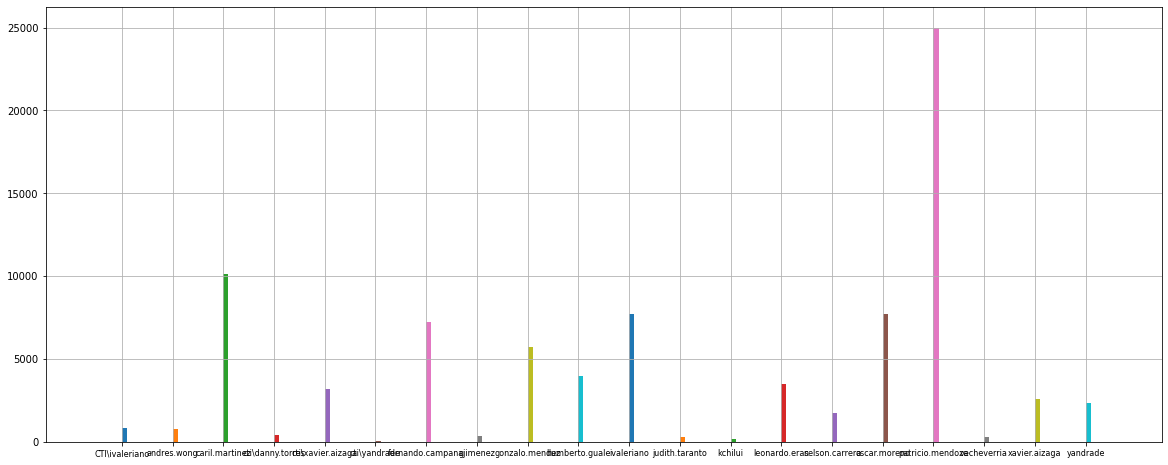

In [4]:
dataframe.groupby("Username")["Username"].hist(figsize=(20,8),xlabelsize=8)

# Algoritmo Apriori
Este algoritmo fue desarrollado por R. Agrawal y R. Srikant en 1994 para poder encontrar conjuntos de item frecuentes dentro de un dataset para crear reglas de asociaciones. [1]

Esta es una tecnica muy usada dentro de la mineria de datos para encontrar relaciones desconocidas, produciendo resultados que pueden ser usados en toma de decisiones o predicciones. Una de sus deventajas es el tiempo que toma en procesar toda la información del dataset.[2]

Al finalizar el analisis se mostrara la siguiente información:

```
Rule: A -> B
Support: 0.061261754770382544
Confidence: 0.02017712042362823
Lift: 8.885613845321796
```

Rule: Regla de asociación A -> B

Support: Porcentaje de conjuntos donde la regla fue verdadera (Frecuencia donde A estaba asociada a B)

Confidence: Porcentaje en el que la regla es verdadera, solo cuando el elemento A ocurre. (Que tan seguido A y B aparecen juntos basado en el numero de ocurrencias de A)

Lift: Mide cuan mas frecuente A es encontrada con B en comparación a cuando no esta B.

## Creación de records para creación de modelo
Para poder entrenar el modelo y obtener resultados debemos crear conjuntos de elementos que tendran esta asociacion implicita. Como nosotros queremos encontrar asociación entre la Mac Address y el Username de los clientes, dejamos estas dos columnas para su análisis. En caso de querer encontrar mas asociaciones podriamos dejar mas información como el AP al que esta conectado.

In [5]:
df = dataframe.groupby([dataframe['DateTime'].dt.date]).mean()["DateTime"]
print(df)

DateTime
2021-10-17   2021-10-17 23:41:36.028168960
2021-10-18   2021-10-18 08:32:25.843478272
2021-10-19   2021-10-19 18:12:25.218434304
2021-10-20   2021-10-20 09:40:48.550530816
2021-10-21   2021-10-21 09:45:14.959881472
2021-10-22   2021-10-22 09:33:19.974117120
2021-10-23   2021-10-23 00:41:08.888888832
2021-10-24   2021-10-24 23:03:26.276190464
2021-10-25   2021-10-25 04:56:22.501264640
2021-10-26   2021-10-26 14:59:13.760431360
2021-10-27   2021-10-27 12:46:34.558976000
2021-10-28   2021-10-28 10:34:32.750263296
2021-10-29   2021-10-29 09:29:04.681672192
2021-11-03   2021-11-03 18:49:27.449137920
2021-11-04   2021-11-04 10:18:05.795346176
2021-11-05   2021-11-05 18:05:55.920935424
2021-11-06   2021-11-06 07:42:03.287823104
2021-11-07   2021-11-07 08:44:56.390890752
2021-11-08   2021-11-08 11:13:30.297093888
2021-11-09   2021-11-09 10:54:09.718451200
2021-11-11   2021-11-11 10:20:45.997792512
2021-11-15   2021-11-15 18:54:16.192916736
2021-11-16   2021-11-16 08:50:20.085964800
Na

C:\Users\JTPC\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
date_start = datetime.datetime.strptime("17/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_end = datetime.datetime.strptime("21/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')

df_section1 = dataframe[(dataframe['DateTime'] > date_start) & (dataframe['DateTime'] < date_end)]
df_section1

,DateTime,Username,Mac Address,Access_Point
0,2021-10-17 23:23:39,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
1,2021-10-17 23:23:39,fernando.campana,ac:af:b9:33:65:e8,Domo_Teleco1
2,2021-10-17 23:24:10,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
3,2021-10-17 23:24:10,fernando.campana,ac:af:b9:33:65:e8,Domo_Teleco1
4,2021-10-17 23:24:41,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
...,...,...,...,...
79515,2021-10-20 18:28:55,xavier.aizaga,60:14:b3:60:c2:0f,Data_Center
79516,2021-10-20 18:28:55,cti\xavier.aizaga,b0:a4:60:23:02:d0,Data_Center
79517,2021-10-20 18:33:28,xavier.aizaga,60:14:b3:60:c2:0f,Data_Center
79518,2021-10-20 18:33:28,cti\xavier.aizaga,b0:a4:60:23:02:d0,Data_Center


In [7]:
date_start = datetime.datetime.strptime("11/11/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_end = datetime.datetime.strptime("17/11/2021 00:00:00", '%d/%m/%Y %H:%M:%S')

df_section2 = dataframe[(dataframe['DateTime'] > date_start) & (dataframe['DateTime'] < date_end)]
df_section2

,DateTime,Username,Mac Address,Access_Point
62846,2021-11-11 09:39:51,gonzalo.mendez,0a:32:e1:06:a2:89,Domo_Teleco1
62847,2021-11-11 09:39:51,oscar.moreno,34:13:e8:34:af:1c,Domo_Teleco2
62848,2021-11-11 09:39:51,gonzalo.mendez,7a:50:6c:eb:e5:f9,Domo_Teleco1
62849,2021-11-11 09:39:51,patricio.mendoza,ac:29:3a:9e:d7:8f,Domo_Teleco2
62850,2021-11-11 09:39:51,oscar.moreno,e0:dc:ff:03:1a:bd,Domo_Teleco2
...,...,...,...,...
83927,2021-11-16 15:32:59,nelson.carrera,4c:d1:a1:b4:60:2d,Lobby
83928,2021-11-16 15:33:31,nelson.carrera,4c:d1:a1:b4:60:2d,Lobby
83929,2021-11-16 15:34:03,nelson.carrera,4c:d1:a1:b4:60:2d,Lobby
83930,2021-11-16 15:34:40,nelson.carrera,4c:d1:a1:b4:60:2d,Lobby


Total Records

In [8]:
df_records_total = dataframe.drop(columns=['DateTime','Access_Point'])

records_total = df_records_total.to_records(index=False)

print(list(records_total)[:30])

[('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:

Section Records

In [9]:
df_records_section1 = df_section1.drop(columns=['DateTime','Access_Point'])

record_section1 = df_records_section1.to_records(index=False)

print(list(record_section1)[:30])

[('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:

In [10]:

df_records_section2 = df_section2.drop(columns=['DateTime','Access_Point'])

record_section2 = df_records_section2.to_records(index=False)

print(list(record_section1)[:30])

[('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:

## Ejecución del algoritmo
A partir de la información organizada ingresamos el algoritmo que ira aprendiendo y generando reglas de asociación para las instancias que encuentra. Luego recorremos estas reglas y las mostramos por consola.

In [69]:
#Funcion para imprimir las reglas
def printRules(lista):
    for item in lista:
        pair = item[0]
        items = [x for x in pair]
        print("Rule: "+ items[0] + " -> "+items[1])
        print("Support: "+ str(item[1])) #Individual popularity (ItemA/TotalTransactions)
        print("Confidence: "+str(item[2][0][2])) #Item A Will include more profit for item B (Item (A+B)/Item (A))
        print("Lift: " + str(item[2][0][3])) #How much Item A includes profit in item B (Confidence/Support)
        print("========================================")

#Funcion para crear un dataset de reglas
def dataframeRules(lista):
    dataset = []
    for item in lista:
        pair = item[0]
        items = [x for x in pair]
        if(":" in items[0] ):
            dataset.append([items[0],items[1],item[1],item[2][0][2],item[2][0][3]])
        else:
            dataset.append([items[1],items[0],item[1],item[2][0][2],item[2][0][3]])
    return pd.DataFrame(dataset,columns=["A","B","Support","Confidence","Lift"])

In [21]:
association_rules_total = apriori(records_total, min_support=0.0045,min_confidence=0.2,min_lift=3,min_length=2)
association_results_total = list(association_rules_total)
#print(association_results_total[0])
#printRules(association_results_total)

In [113]:
dataframe_rules_total = dataframeRules(association_results_total).set_index("A")
dataframe_rules_total = dataframe_rules_total.drop(index="3c:91:80:2d:8c:b3",)
dataframe_rules_total

,B,Support,Confidence,Lift
A,,,,
04:1b:ba:7f:c9:27,ivaleriano,0.024687,1.000000,10.860766
0a:32:e1:06:a2:89,gonzalo.mendez,0.019718,1.000000,14.668298
14:56:8e:f1:0a:79,humberto.guale,0.047074,1.000000,21.243230
34:13:e8:34:af:1c,oscar.moreno,0.068567,1.000000,10.905925
3c:91:80:24:40:e9,cti\danny.torres,0.004647,1.000000,215.210256
4c:d1:a1:b4:60:2d,nelson.carrera,0.020660,0.846266,40.962421
6a:3f:63:6d:5b:f9,xavier.aizaga,0.025437,1.000000,32.519179
6e:ec:41:dd:0f:47,patricio.mendoza,0.009365,1.000000,3.357817
7a:50:6c:eb:e5:f9,gonzalo.mendez,0.023090,1.000000,14.668298


Algoritmo en seccion

In [23]:
association_rules_section1 = apriori(record_section1, min_support=0.0045,min_confidence=0.2,min_lift=3,min_length=2)
association_results_section1 = list(association_rules_section1)
#printRules(association_results_section1)

In [102]:
dataframe_rules_section1 = dataframeRules(association_results_section1).set_index("A")
dataframe_rules_section1

,B,Support,Confidence,Lift
A,,,,
30:07:4d:99:9d:38,gjimenez,0.015989,1.0,58.613527
3c:91:80:2d:8c:b3,CTI\ivaleriano,0.027693,1.0,36.110119
4c:d1:a1:b4:60:2d,ivaleriano,0.025797,1.0,14.960543
60:14:b3:60:c2:0f,xavier.aizaga,0.028929,1.0,14.274118
6a:3f:63:6d:5b:f9,xavier.aizaga,0.033298,1.0,14.274118
84:1b:77:83:aa:c2,andres.wong,0.051100,1.0,19.569355
90:cc:df:78:ab:18,xavier.aizaga,0.007830,1.0,14.274118
9c:5a:81:cb:00:23,ivaleriano,0.041045,1.0,14.960543
9c:b6:d0:10:22:6b,leonardo.eras,0.009313,1.0,107.371681


Observaciones:
* La Mac Address de 3c:91:80:2d:8c:b3 en una sección pertenece primero a nelson.carrera con confianza 0.846 y luego a ivaleriano con confianza 1.0.
* Algunos aparecen en la sección 1, pero no en el total. Por la frecuencia del item, ejemplo: gjimenez con mac 30:07:4d:99:9d:38

In [118]:
association_rules_section2 = apriori(record_section1, min_support=0.0045,min_confidence=0.2,min_lift=3,min_length=2)
association_results_section2 = list(association_rules_section2)
dataframe_rules_section2 = dataframeRules(association_results_section2).set_index("A")
dataframe_rules_section2

,B,Support,Confidence,Lift
A,,,,
30:07:4d:99:9d:38,gjimenez,0.015989,1.0,58.613527
3c:91:80:2d:8c:b3,CTI\ivaleriano,0.027693,1.0,36.110119
4c:d1:a1:b4:60:2d,ivaleriano,0.025797,1.0,14.960543
60:14:b3:60:c2:0f,xavier.aizaga,0.028929,1.0,14.274118
6a:3f:63:6d:5b:f9,xavier.aizaga,0.033298,1.0,14.274118
84:1b:77:83:aa:c2,andres.wong,0.051100,1.0,19.569355
90:cc:df:78:ab:18,xavier.aizaga,0.007830,1.0,14.274118
9c:5a:81:cb:00:23,ivaleriano,0.041045,1.0,14.960543
9c:b6:d0:10:22:6b,leonardo.eras,0.009313,1.0,107.371681


## Actualización de información

Algoritmo para actualizar y agregar nuevas reglas.

In [112]:
total_indexes = dataframe_rules_total.index
updated_dataframe_rules = dataframe_rules_total
for mac in dataframe_rules_section1.index:
    if mac not in total_indexes:
        updated_dataframe_rules = updated_dataframe_rules.append(dataframe_rules_section1.loc[mac])
    elif dataframe_rules_total.loc[mac]["B"] != dataframe_rules_section1.loc[mac]["B"]:
        updated_dataframe_rules = updated_dataframe_rules.drop(mac)
        updated_dataframe_rules = updated_dataframe_rules.append(dataframe_rules_section1.loc[mac])
updated_dataframe_rules

,B,Support,Confidence,Lift
A,,,,
04:1b:ba:7f:c9:27,ivaleriano,0.024687,1.0,10.860766
0a:32:e1:06:a2:89,gonzalo.mendez,0.019718,1.0,14.668298
14:56:8e:f1:0a:79,humberto.guale,0.047074,1.0,21.243230
34:13:e8:34:af:1c,oscar.moreno,0.068567,1.0,10.905925
3c:91:80:24:40:e9,cti\danny.torres,0.004647,1.0,215.210256
6a:3f:63:6d:5b:f9,xavier.aizaga,0.025437,1.0,32.519179
6e:ec:41:dd:0f:47,patricio.mendoza,0.009365,1.0,3.357817
7a:50:6c:eb:e5:f9,gonzalo.mendez,0.023090,1.0,14.668298
84:1b:77:83:aa:c2,andres.wong,0.009162,1.0,109.144343


Lo convertimos en función

In [114]:
def updateRules(lastRules, newRules):
    total_indexes = lastRules.index
    updated_dataframe_rules = lastRules
    for mac in newRules.index:
        if mac not in total_indexes:
            updated_dataframe_rules = updated_dataframe_rules.append(newRules.loc[mac])
        elif lastRules.loc[mac]["B"] != newRules.loc[mac]["B"]:
            updated_dataframe_rules = updated_dataframe_rules.drop(mac)
            updated_dataframe_rules = updated_dataframe_rules.append(newRules.loc[mac])
    return updated_dataframe_rules

In [119]:
#Prueba de funcion
new_association_rules = updateRules(dataframe_rules_total,dataframe_rules_section1)
#Creación de archivo csv
new_association_rules.to_csv("association_rules.csv")

In [120]:
updateRules(dataframe_rules_section1,dataframe_rules_section2)

,B,Support,Confidence,Lift
A,,,,
30:07:4d:99:9d:38,gjimenez,0.015989,1.0,58.613527
3c:91:80:2d:8c:b3,CTI\ivaleriano,0.027693,1.0,36.110119
4c:d1:a1:b4:60:2d,ivaleriano,0.025797,1.0,14.960543
60:14:b3:60:c2:0f,xavier.aizaga,0.028929,1.0,14.274118
6a:3f:63:6d:5b:f9,xavier.aizaga,0.033298,1.0,14.274118
84:1b:77:83:aa:c2,andres.wong,0.051100,1.0,19.569355
90:cc:df:78:ab:18,xavier.aizaga,0.007830,1.0,14.274118
9c:5a:81:cb:00:23,ivaleriano,0.041045,1.0,14.960543
9c:b6:d0:10:22:6b,leonardo.eras,0.009313,1.0,107.371681


## Resultados
Como podemos observar en el punto anterior se han creado reglas de asociación que nos permite identificar una mac address con un nombre de usuario debido a su frecuencia en el dataset. Así mismo se nos muestra su soporte y confianza.

# Referencias
[1] GeeksforGeeks. 2021. Apriori Algorithm - GeeksforGeeks. [online] Available at: <https://www.geeksforgeeks.org/apriori-algorithm/> [Accessed 3 November 2021].

[2] M. Al-Maolegi en B. Arkok, “An improved Apriori algorithm for association rules”, arXiv preprint arXiv:1403. 3948, 2014. 